<h2 style="font-size:50px; font-family:Garamond; background-color:#FFFFFF; color:#000000; text-align:center; border-radius:5px; padding:5px">
    Weather Models for Rain Prediction in Australia
</h2>

This dataset contains detailed meteorological information recorded in Albury, Australia, for a specific period. It includes 23 attributes for each day, capturing various aspects of the weather. These attributes include:

- **Date**: The date of the weather observation.
- **Location**: The location where the observation was made.
- **MinTemp**: Minimum temperature of the day (in degrees Celsius).
- **MaxTemp**: Maximum temperature of the day (in degrees Celsius).
- **Rainfall**: Total rainfall recorded for the day (in millimeters).
- **Evaporation**: Total evaporation recorded for the day (in millimeters).
- **Sunshine**: Total hours of sunshine recorded for the day.
- **WindGustDir**: The direction of the strongest wind gust during the day.
- **WindGustSpeed**: The speed of the strongest wind gust during the day (in kilometers per hour).
- **WindDir9am**: The wind direction at 9 AM.
- **WindDir3pm**: The wind direction at 3 PM.
- **WindSpeed9am**: The wind speed at 9 AM (in kilometers per hour).
- **WindSpeed3pm**: The wind speed at 3 PM (in kilometers per hour).
- **Humidity9am**: The humidity level at 9 AM (percentage).
- **Humidity3pm**: The humidity level at 3 PM (percentage).
- **Pressure9am**: The atmospheric pressure at 9 AM (in hPa).
- **Pressure3pm**: The atmospheric pressure at 3 PM (in hPa).
- **Cloud9am**: The cloud cover at 9 AM (measured in oktas).
- **Cloud3pm**: The cloud cover at 3 PM (measured in oktas).
- **Temp9am**: The temperature at 9 AM (in degrees Celsius).
- **Temp3pm**: The temperature at 3 PM (in degrees Celsius).
- **RainToday**: Indicator of whether it rained today (Yes or No).
- **RainTomorrow**: Indicator of whether it rained the next day (Yes or No).

This dataset provides comprehensive insights into daily weather patterns and variations, aiding in climate analysis and prediction.

<h6 style="font-size:50px; font-family:Garamond; background-color:#CB112D; color:#eee; text-align:center; border-radius:5px; padding:5px">
    import libraries
</h6>c

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier









<h2 style="font-size:50px; font-family:Garamond; background-color:#FFFFFF; color:#000000; text-align:center; border-radius:5px; padding:5px">
    Load the data
</h2>

In [3]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


<h2 style="font-size:50px; font-family:Garamond; background-color:#FFFFFF; color:#000000; text-align:center; border-radius:5px; padding:5px">
    Exploratory Data Analysis
</h2>

In [3]:
df.shape

(145460, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<h2 style="font-size:50px; font-family:Garamond; background-color:#FFFFFF; color:#000000; text-align:center; border-radius:5px; padding:5px">
    Handling Duplicates
</h2>

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

<h2 style="font-size:50px; font-family:Garamond; background-color:#FFFFFF; color:#000000; text-align:center; border-radius:5px; padding:5px">
    Handling Nulls
</h2>

In [7]:
columns_to_drop = ['Evaporation','Sunshine']
df = df.drop(columns=columns_to_drop)

In [8]:
cols_to_clean = []

for col in df.columns:
    null_count = df[col].isnull().sum()
    if null_count < 10000:
        cols_to_clean.append(col)





In [9]:
cols_to_clean

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [10]:
df = df.dropna(subset=cols_to_clean)

In [11]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir       6014
WindGustSpeed     6001
WindDir9am        7557
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      11215
Pressure3pm      11151
Cloud9am         50169
Cloud3pm         51552
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [12]:
for col in df.columns:
    if df[col].isnull().sum() > 0 :
        if df[col].dtype == 'object':
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)
        else:
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_6964\504241766.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_6964\504241766.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [13]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<h2 style="font-size:50px; font-family:Garamond; background-color:#FFFFFF; color:#000000; text-align:center; border-radius:5px; padding:5px">
    Feature Engineering
</h2>

In [14]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Quarter'] = df['Date'].dt.quarter
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['Season'] = df['Month'] % 12 // 3 + 1

season_map = {
    1: 'Summer',     # Dec–Feb
    2: 'Autumn',     # Mar–May
    3: 'Winter',     # Jun–Aug
    4: 'Spring'      # Sep–Nov
}

df['Season_Name'] = df['Season'].map(season_map)
df = df.sort_values('Date')


In [17]:
df['TemRange'] = df['MaxTemp'] - df['MinTemp']
df['AvgPreasure'] = (df['Pressure9am'] + df['Pressure3pm']) / 2
df['AvgTemp'] = (df['Temp9am'] + df['Temp3pm']) / 2
df['AvgCloud'] = (df['Cloud9am'] + df['Cloud3pm']) / 2
df['AVGWind'] = ( df['WindSpeed9am'] + df['WindSpeed3pm']) / 2
df['AvgHumidity'] = (df['Humidity9am'] + df['Humidity3pm']) / 2

In [18]:
df['HumidityDiff'] = df['Humidity3pm'] - df['Humidity9am']
df['PressureDiff'] = df['Pressure3pm'] - df['Pressure9am']
df['TempDiff'] = df['Temp3pm'] - df['Temp9am']
df['WindSpeedDiff'] = df['WindSpeed3pm'] - df['WindSpeed9am']

df['IsWindy'] = (df['WindGustSpeed'] > 35).astype(int)
df['IsHumid'] = (df['Humidity3pm'] > 70).astype(int)

In [19]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day', 'DayOfWeek',
       'Quarter', 'WeekOfYear', 'Season', 'Season_Name', 'TemRange',
       'AvgPreasure', 'AvgTemp', 'AvgCloud', 'AVGWind', 'AvgHumidity',
       'HumidityDiff', 'PressureDiff', 'TempDiff', 'WindSpeedDiff', 'IsWindy',
       'IsHumid'],
      dtype='object')

<h2 style="font-size:50px; font-family:Garamond; background-color:#FFFFFF; color:#000000; text-align:center; border-radius:5px; padding:5px">
    Visualization
</h2>

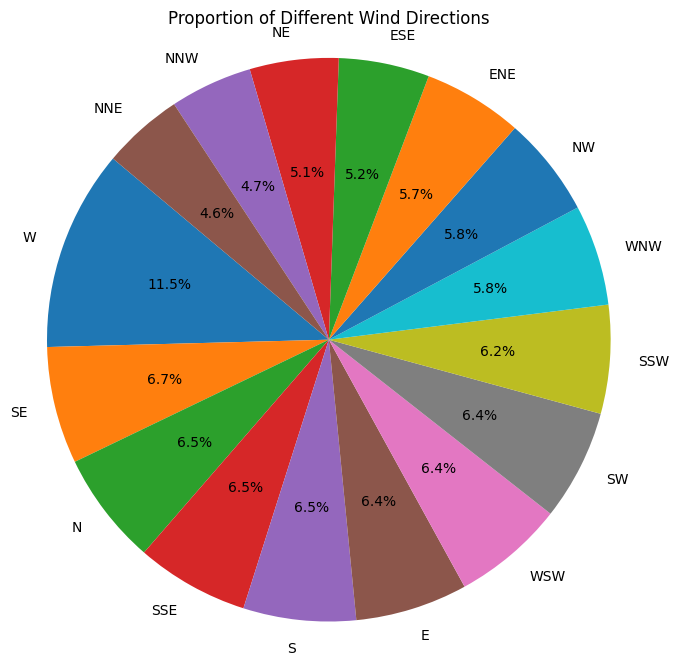

In [18]:
wind_counts = df['WindGustDir'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(wind_counts, labels=wind_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Different Wind Directions')
plt.axis('equal')
plt.show()

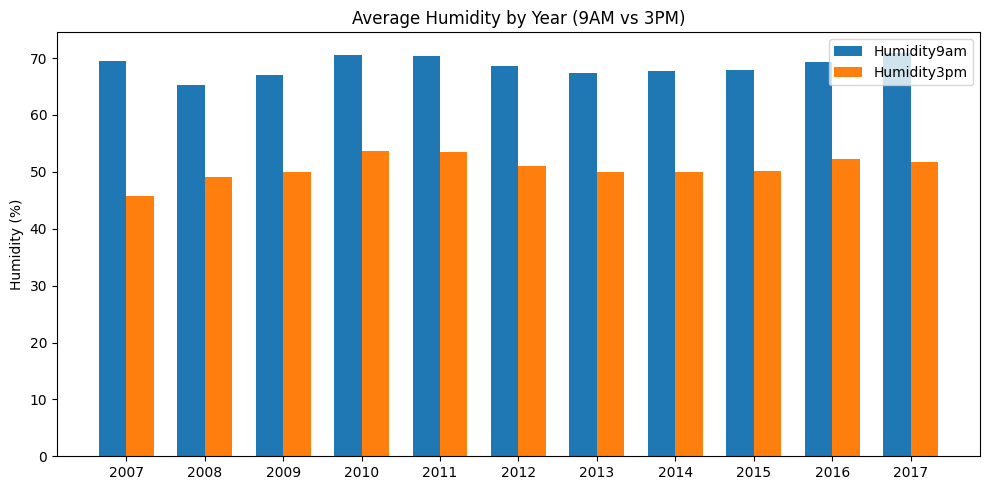

In [19]:
# aggregate humidity by season
year_data = df.groupby('Year')[['Humidity9am', 'Humidity3pm']].mean()

# prepare plot
bar_width = 0.35
x = np.arange(len(year_data))

plt.figure(figsize=(10, 5))

plt.bar(x - bar_width/2, year_data['Humidity9am'], 
        width=bar_width, label='Humidity9am')
plt.bar(x + bar_width/2, year_data['Humidity3pm'], 
        width=bar_width, label='Humidity3pm')

plt.title('Average Humidity by Year (9AM vs 3PM)')
plt.ylabel('Humidity (%)')
plt.xticks(x, year_data.index)
plt.legend()
plt.tight_layout()

plt.show()

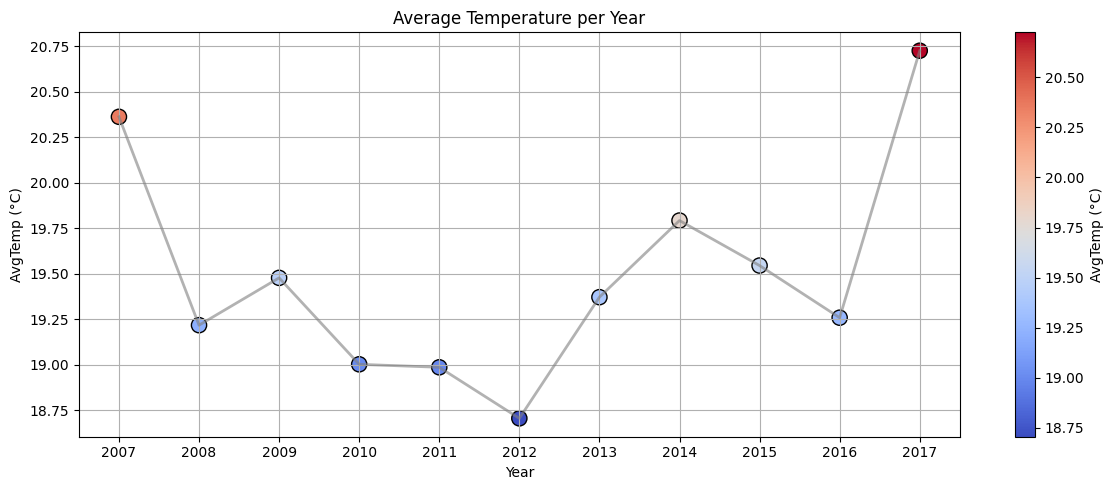

In [20]:
# Compute average temperature per year
year_data = df.groupby('Year')['AvgTemp'].mean()

# Plot
plt.figure(figsize=(12, 5))

# color map based on AvgTemp
colors = year_data.values

plt.scatter(
    year_data.index, 
    year_data.values, 
    s=120, 
    c=colors, 
    cmap='coolwarm', 
    edgecolor='black'
)

# line connecting points
plt.plot(
    year_data.index, 
    year_data.values, 
    linewidth=2, 
    color='gray', 
    alpha=0.6
)

plt.title('Average Temperature per Year')
plt.ylabel('AvgTemp (°C)')
plt.xlabel('Year')
plt.xticks(year_data.index)
plt.colorbar(label='AvgTemp (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_21312\207611381.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainTomorrow', data=df,palette=["#0b3d0b", "#2c2c2c"])


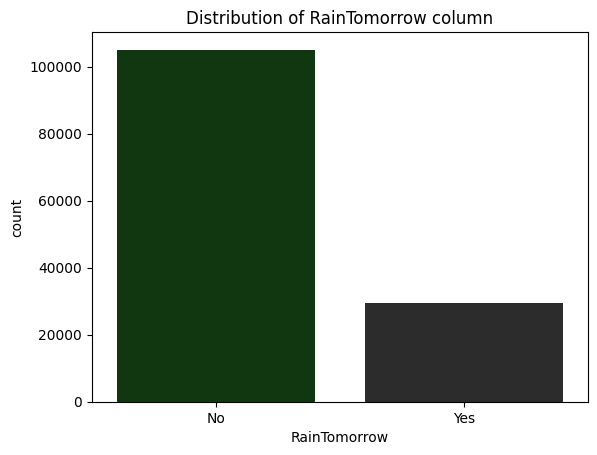

In [21]:
# Visualize the distribution of the target variable to understand the class balance
# (the classes are not balanced)
sns.countplot(x='RainTomorrow', data=df,palette=["#0b3d0b", "#2c2c2c"])
plt.title('Distribution of RainTomorrow column')
plt.show()

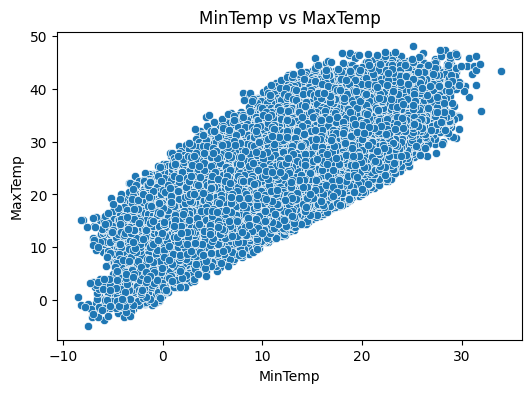

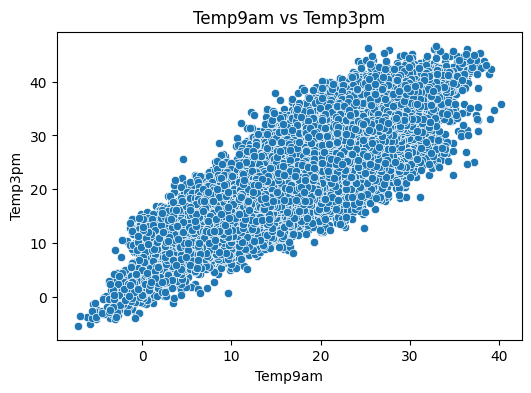

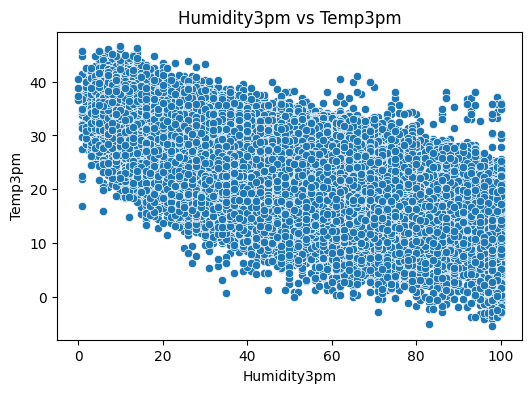

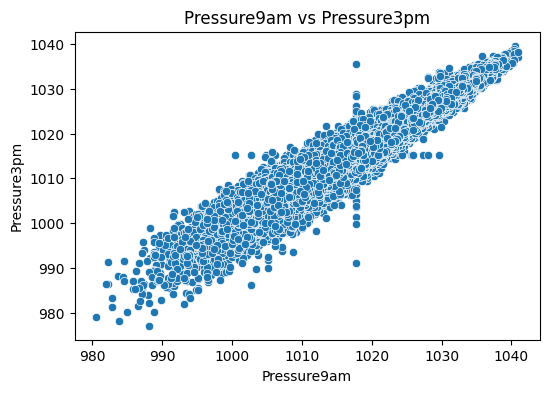

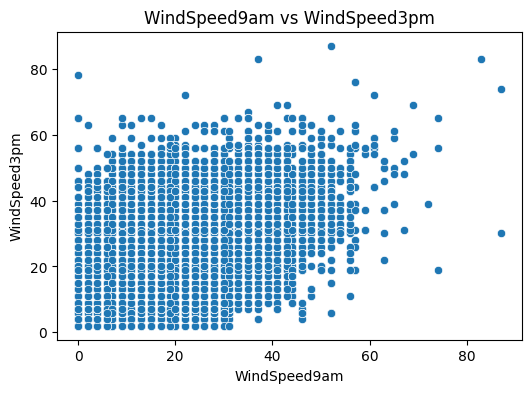

In [22]:
pairs = [
    ('MinTemp', 'MaxTemp'),
    ('Temp9am', 'Temp3pm'),
    ('Humidity3pm', 'Temp3pm'),
    ('Pressure9am', 'Pressure3pm'),
    ('WindSpeed9am', 'WindSpeed3pm')
]

for x, y in pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'{x} vs {y}')
    plt.show()

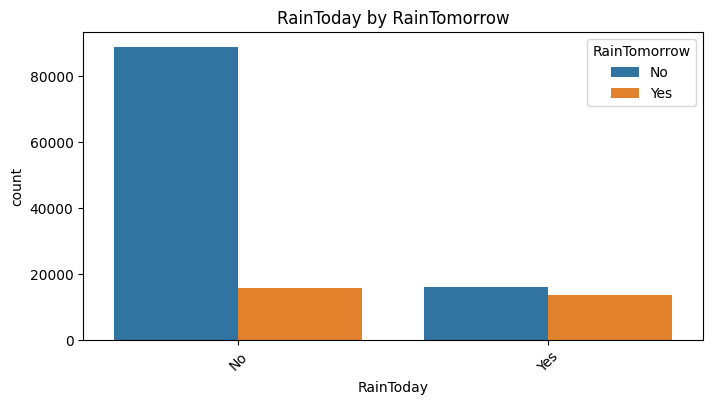

In [23]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='RainToday', hue='RainTomorrow')
plt.title('RainToday by RainTomorrow')
plt.xticks(rotation=45)
plt.show()

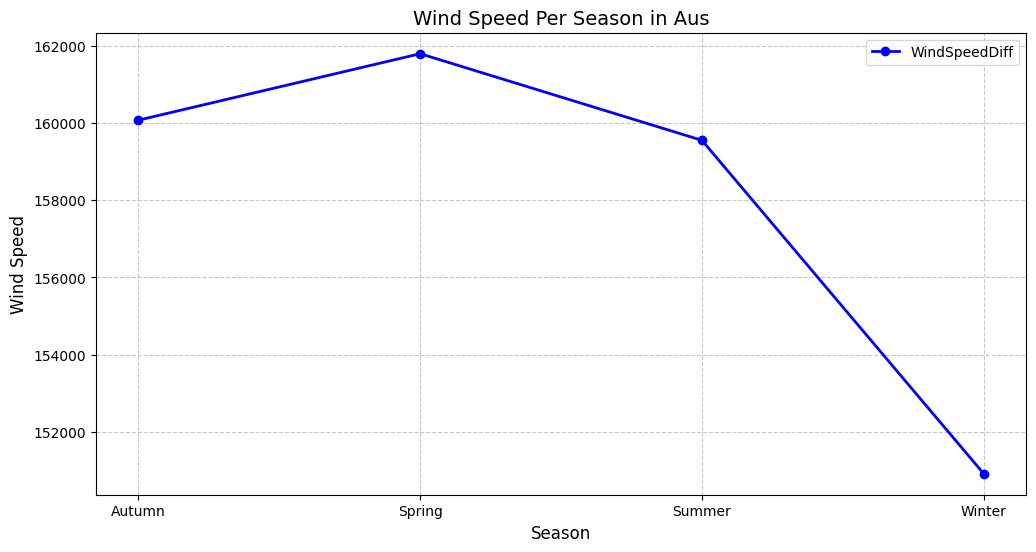

In [24]:
season_data = df.groupby('Season_Name')['WindSpeedDiff'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(season_data['Season_Name'], season_data['WindSpeedDiff'], color='blue', linewidth=2, marker='o', label="WindSpeedDiff")
plt.title('Wind Speed Per Season in Aus', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Wind Speed', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

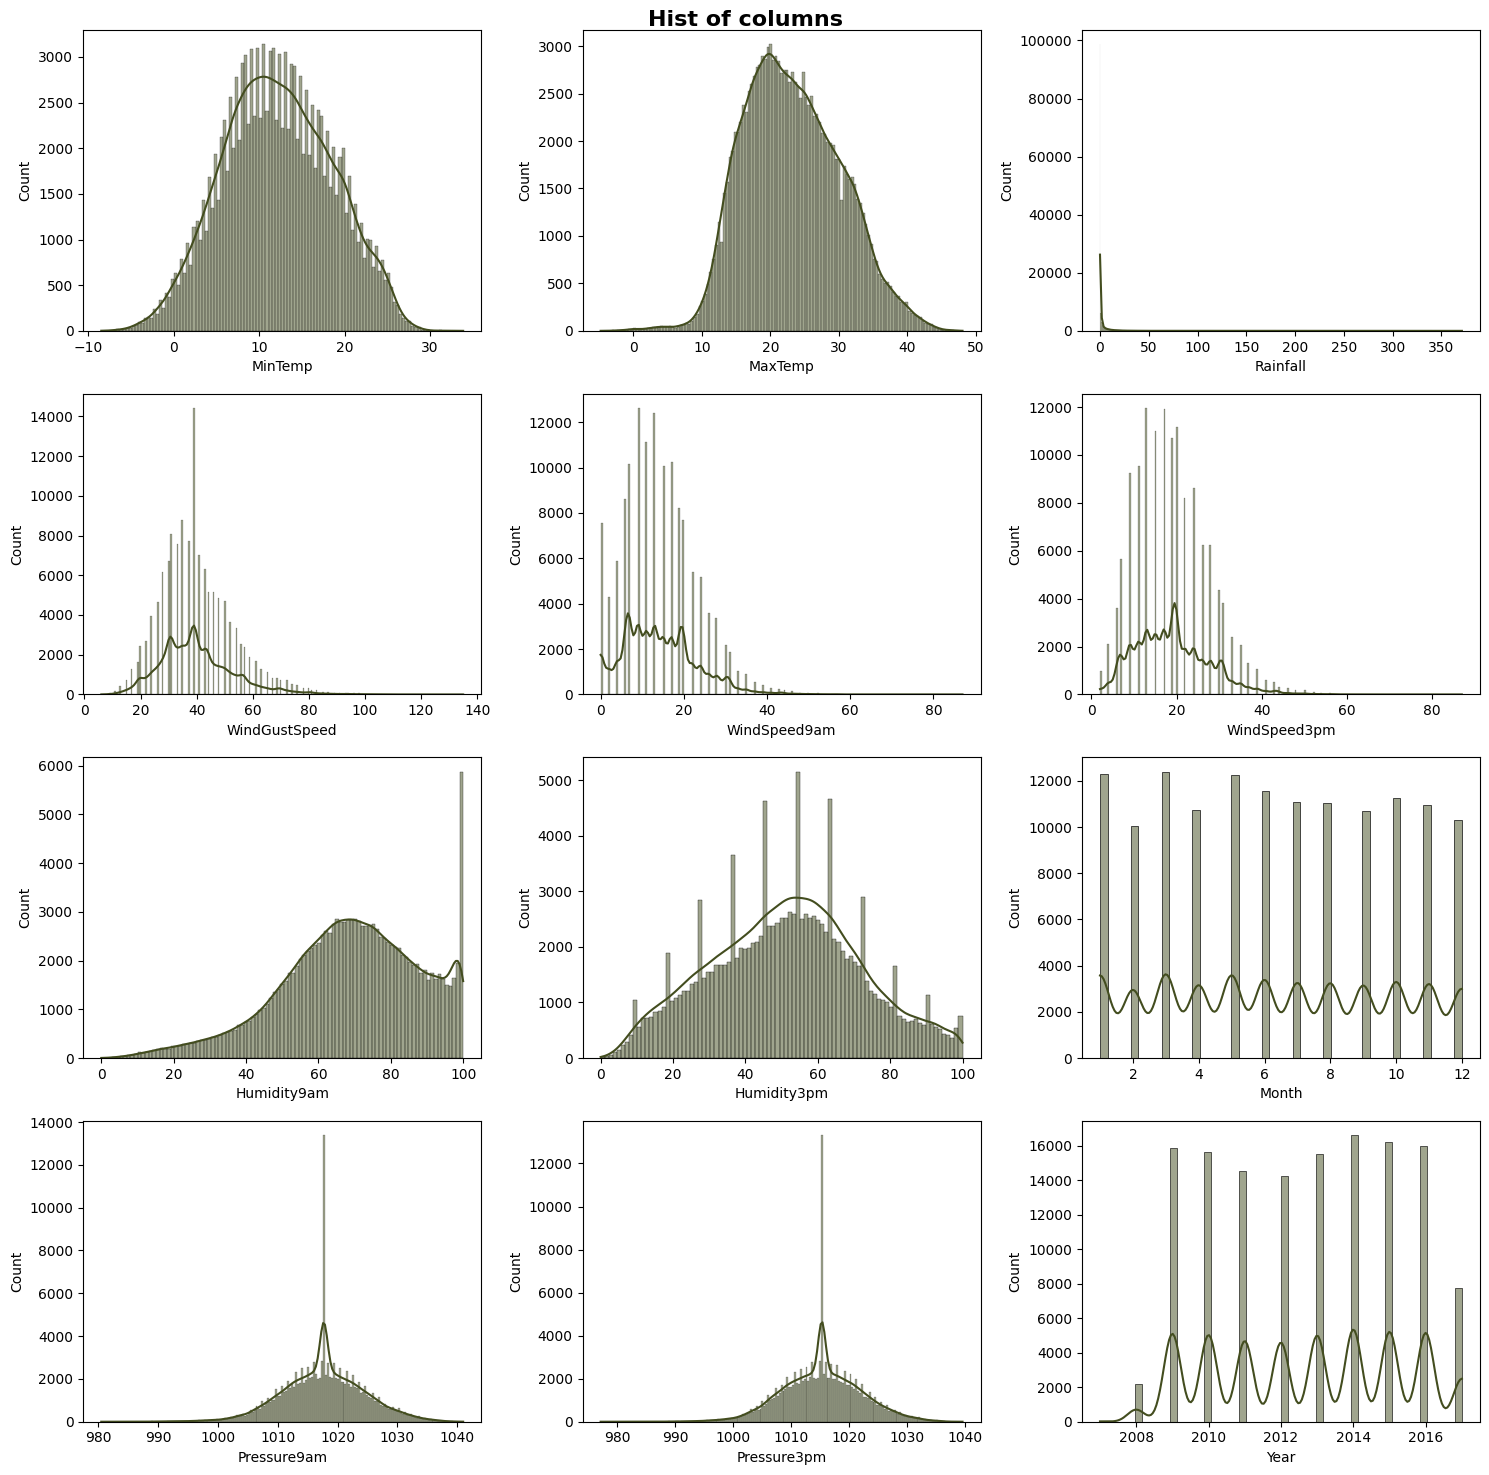

In [25]:
fig, axes = plt.subplots(figsize=(15, 15), nrows=4, ncols=3)
fig.suptitle('Hist of columns', fontsize=16, fontweight='bold')

i = 0
j = 0
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
        'Humidity9am', 'Humidity3pm', 'Month', 'Pressure9am', 'Pressure3pm', 'Year']

for col in columns:
    sns.histplot(ax=axes[i, j], data=df, kde=True, x=col, color="#434d1f")  
    if j == 2:
        i += 1
        j = 0
    else:
        j += 1

plt.tight_layout()
plt.show()


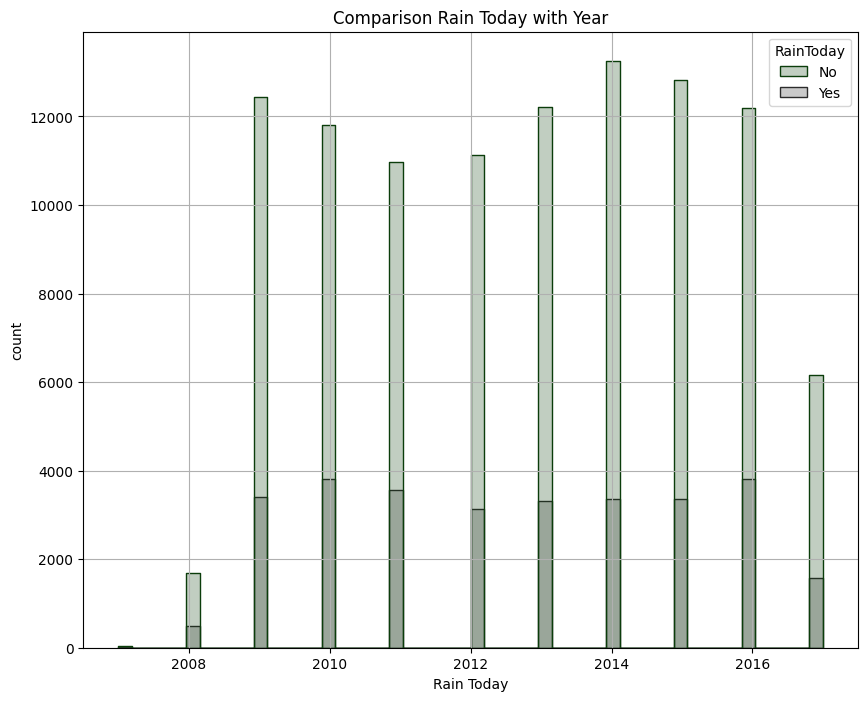

In [26]:
plt.figure (figsize=(10,8))
sns.histplot(x= "Year", hue = "RainToday",data =df,element ="step",common_norm=False,palette=["#0b3d0b", "#2c2c2c"]     
)
plt.grid()
plt.title("Comparison Rain Today with Year")
plt.xlabel("Rain Today" )
plt.ylabel("count")
plt.show()

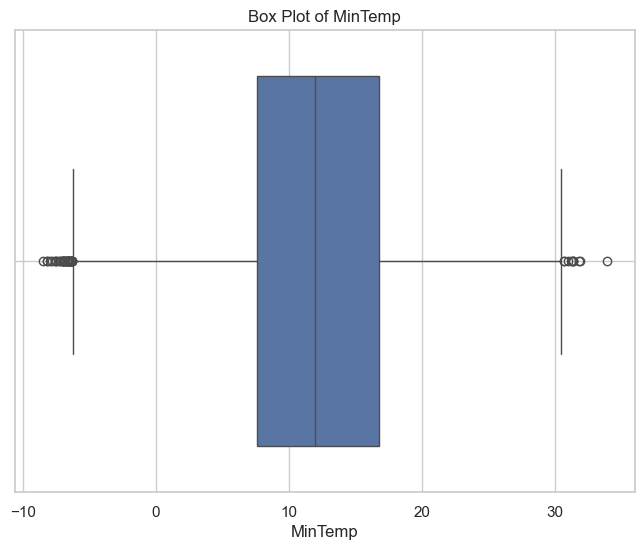

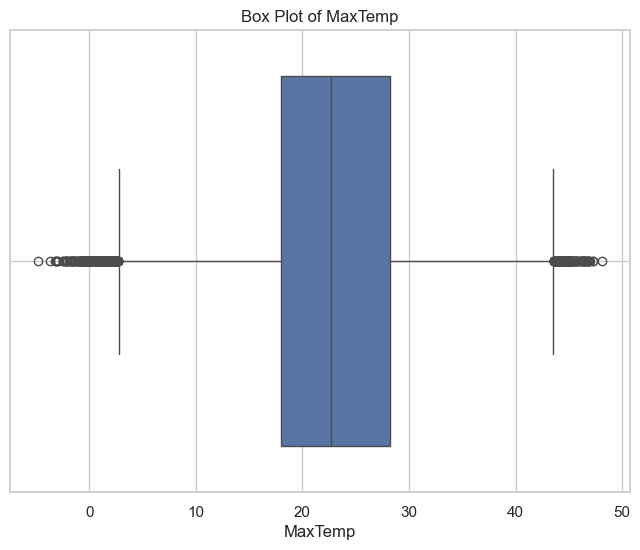

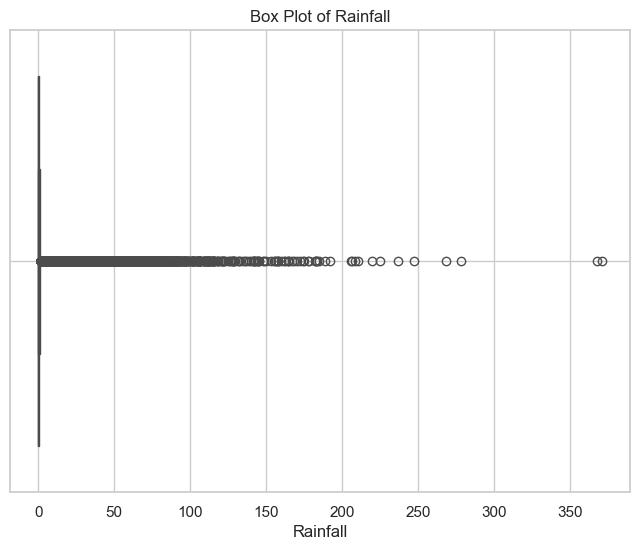

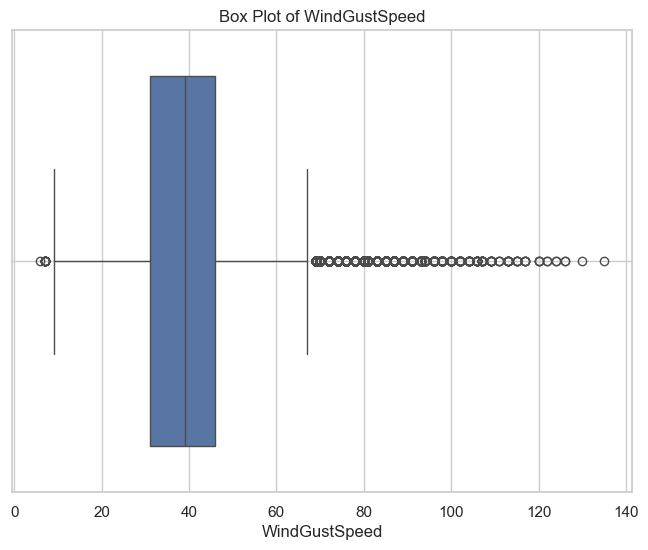

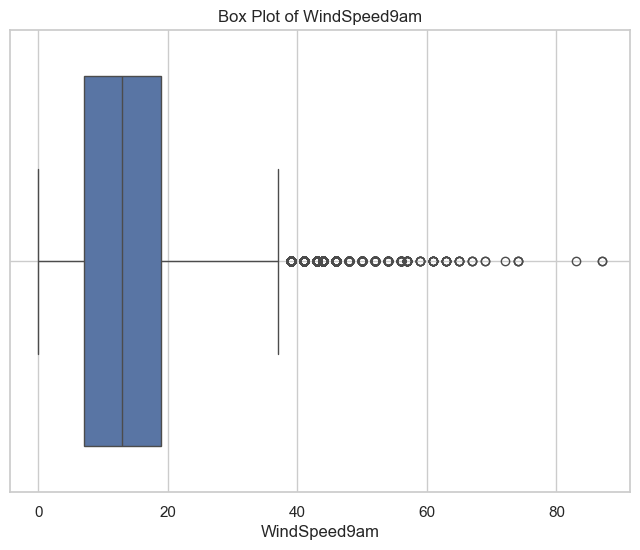

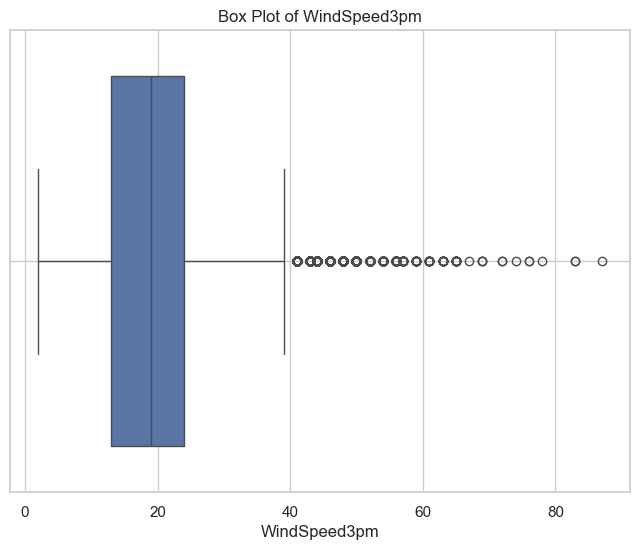

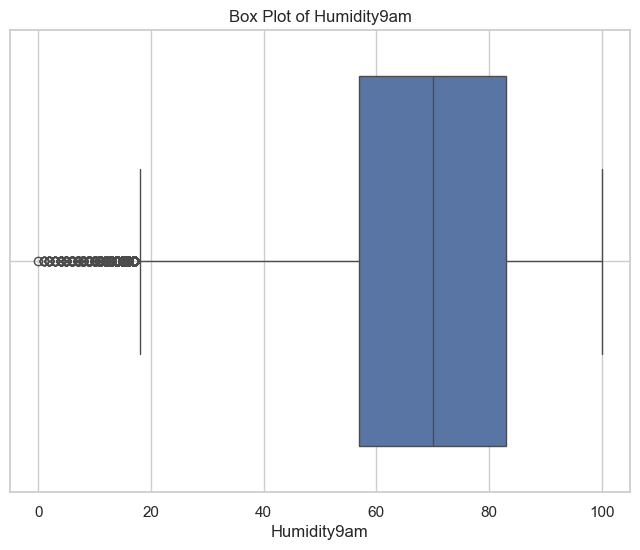

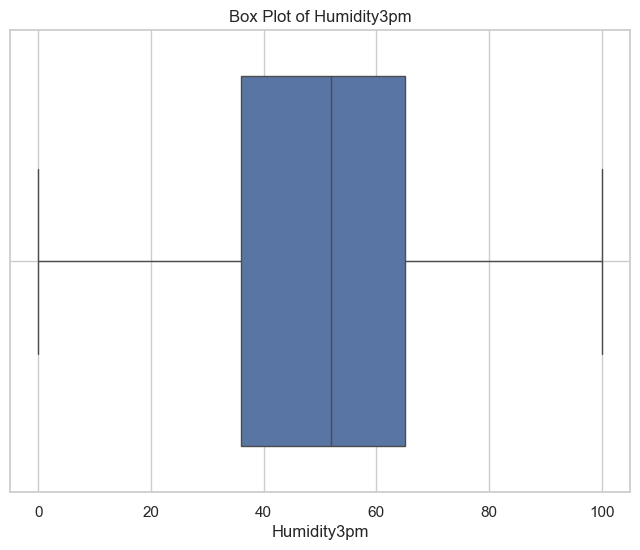

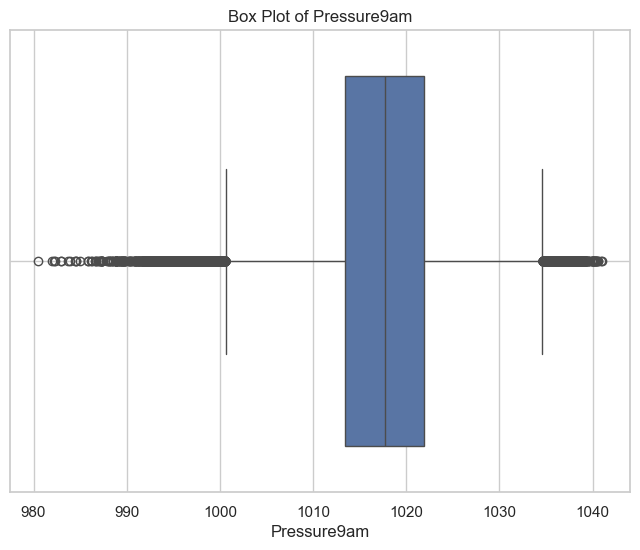

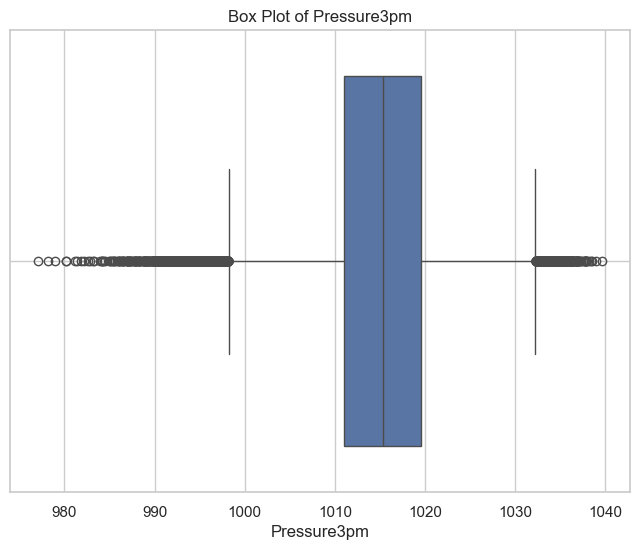

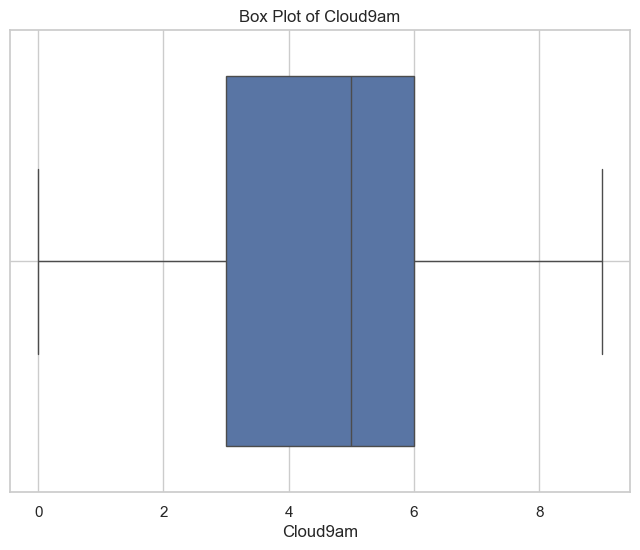

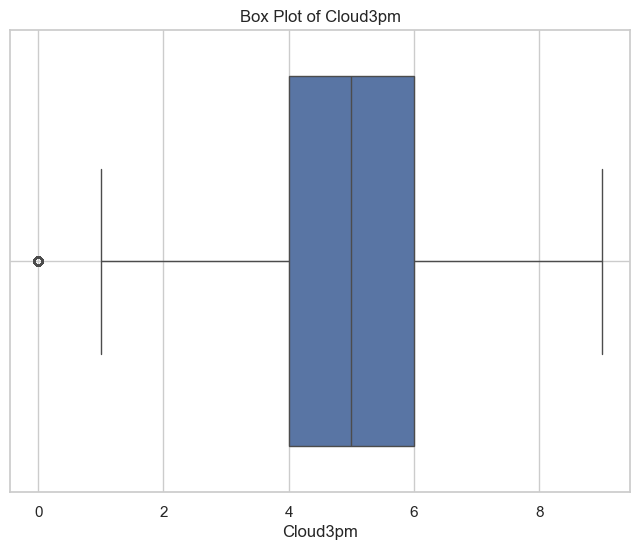

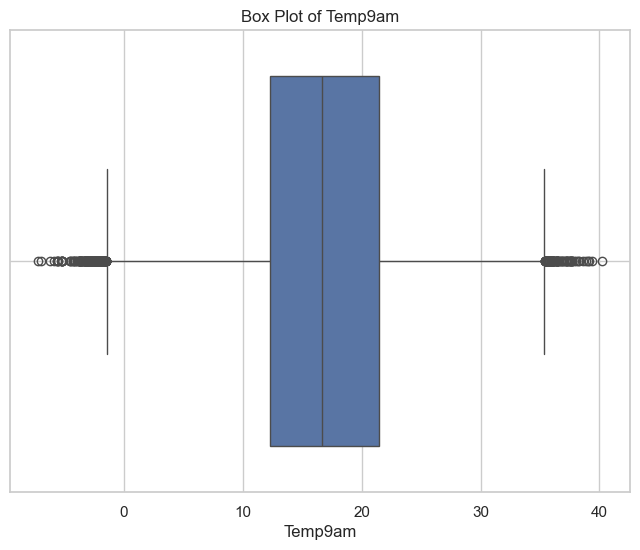

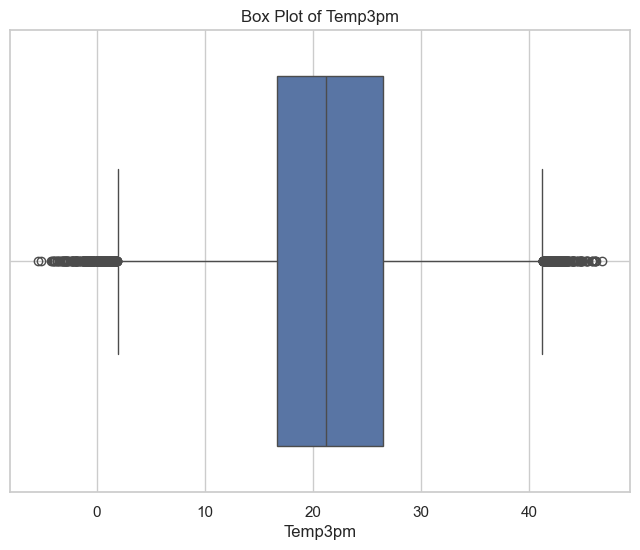

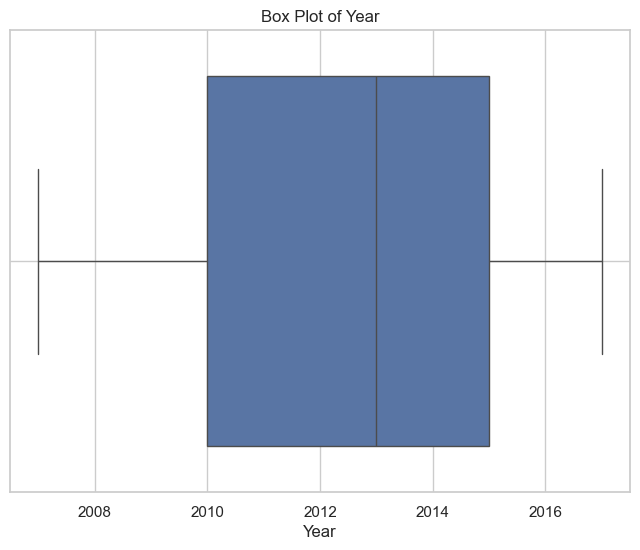

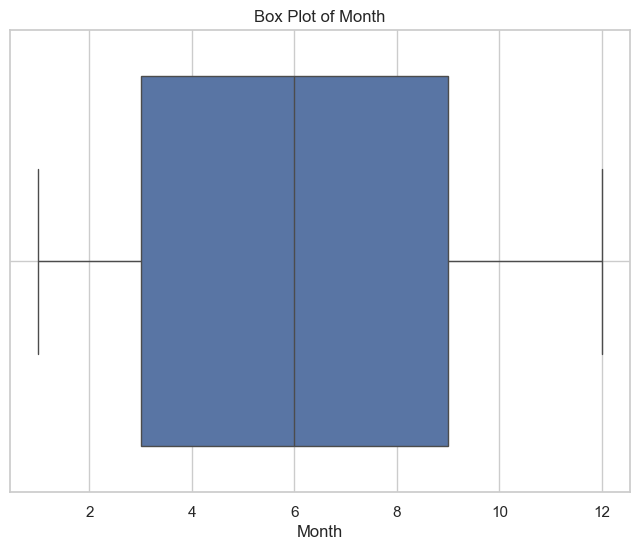

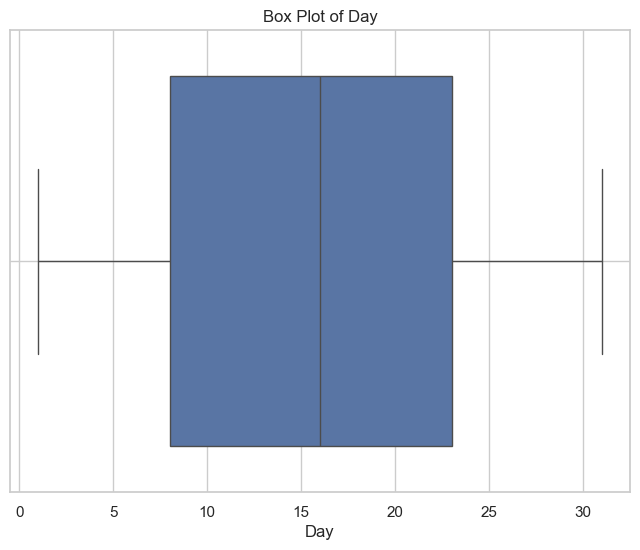

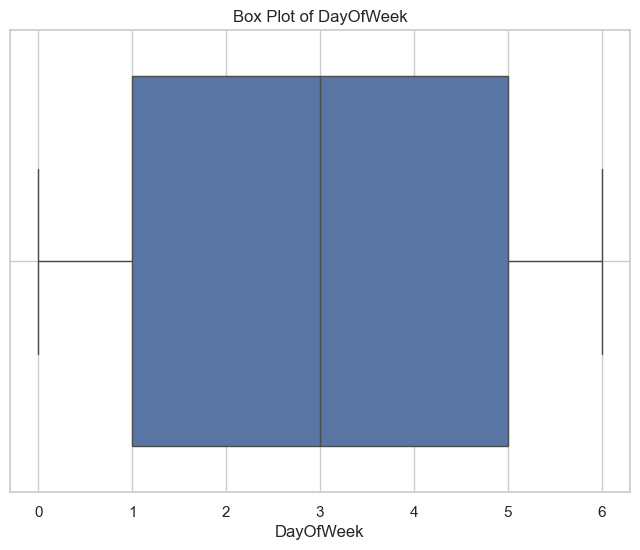

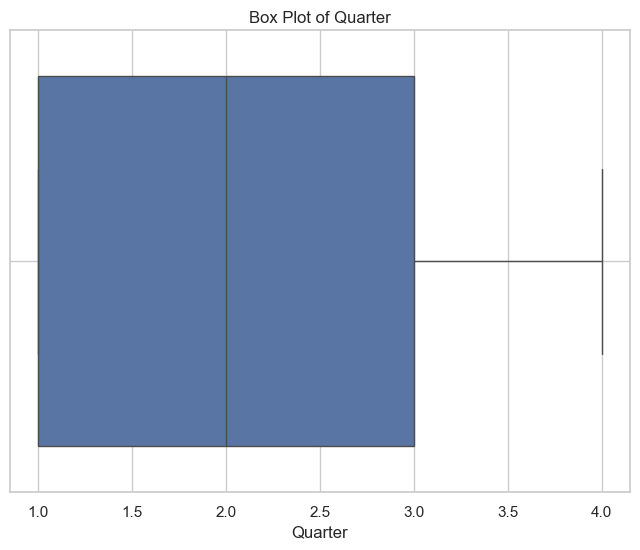

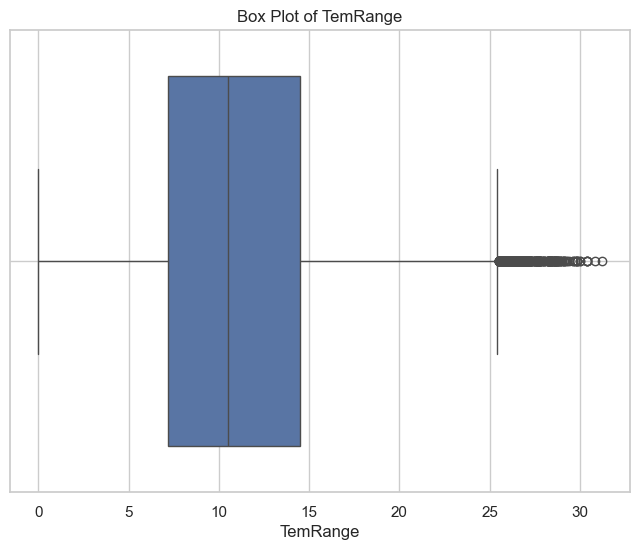

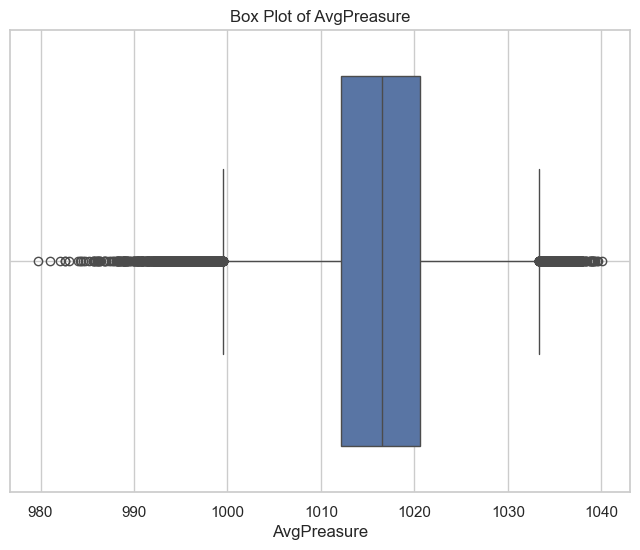

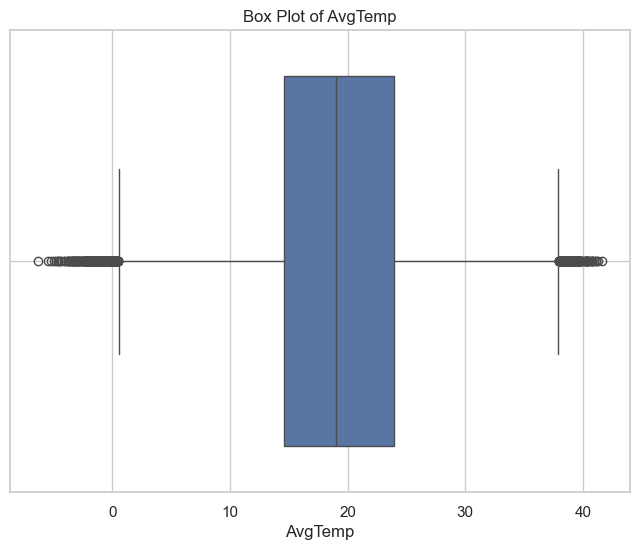

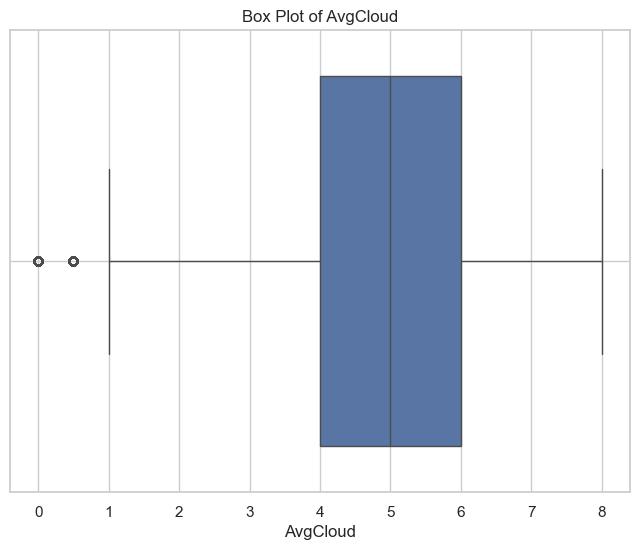

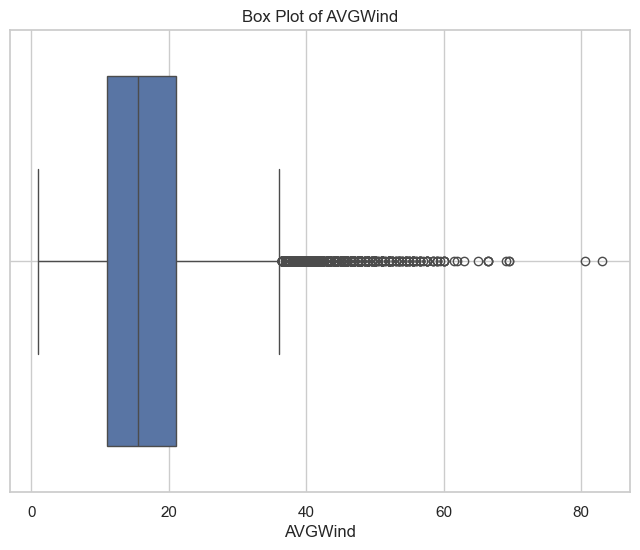

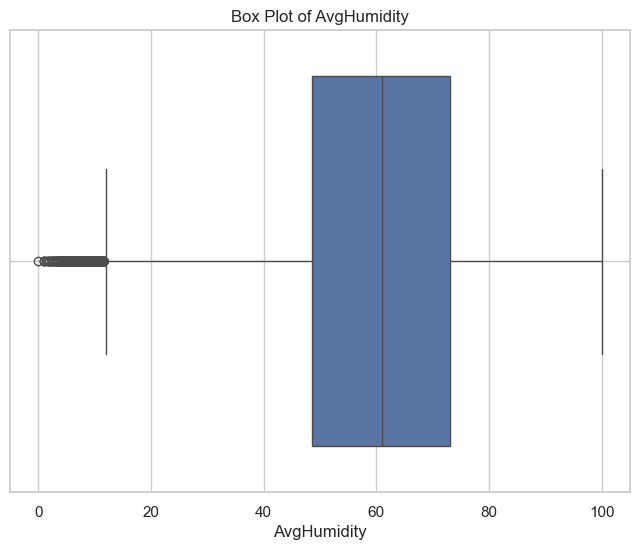

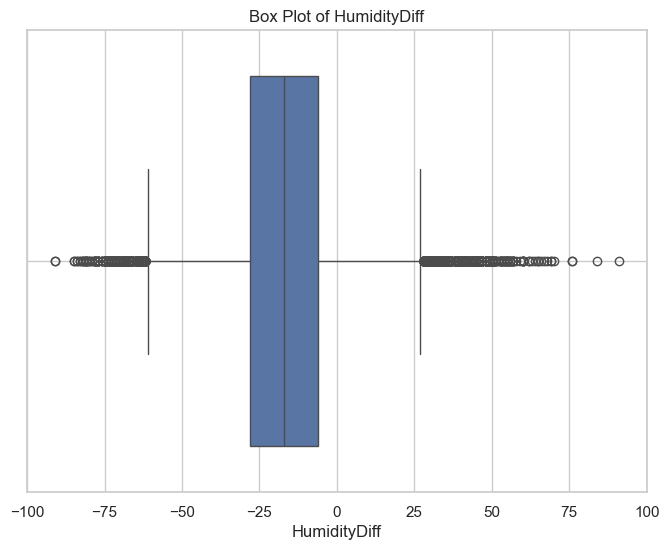

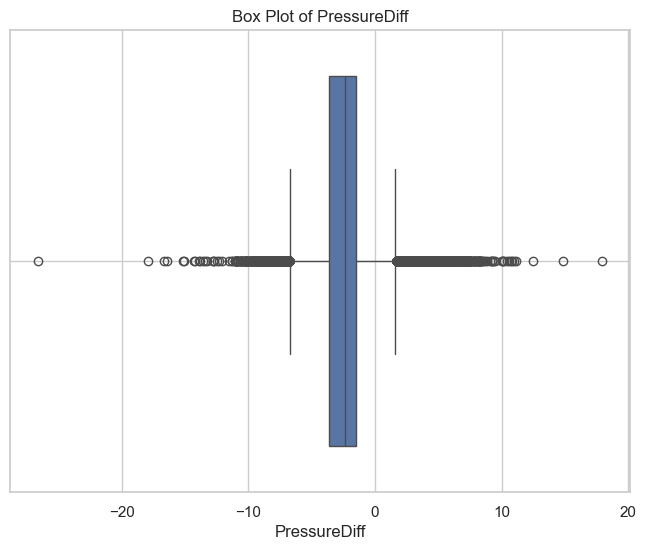

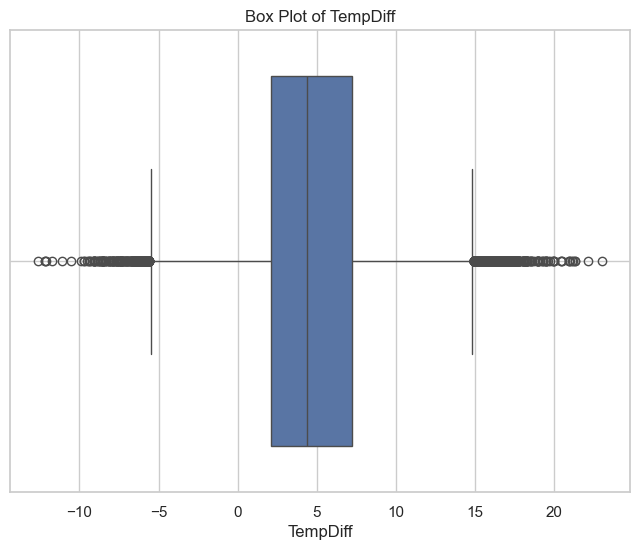

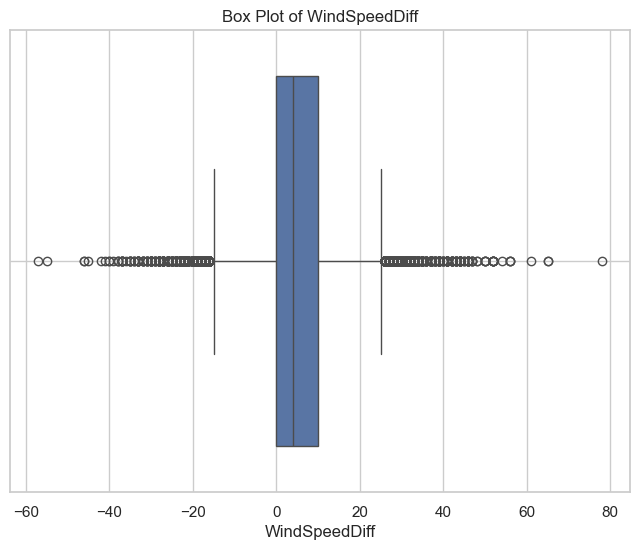

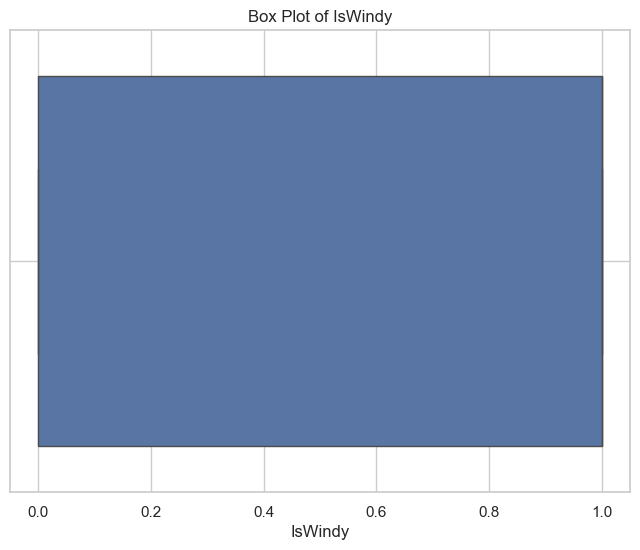

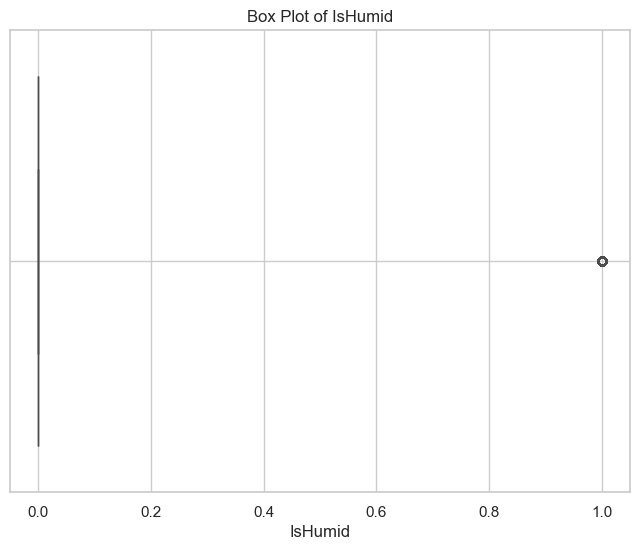

In [25]:
sns.set(style="whitegrid")

# Plotting box plots for numerical columns
for col in df.select_dtypes(include=['float64','int64','int32']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])  
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    
    
    plt.grid(True)  
    plt.show()

<h2 style="font-size:50px; font-family:Garamond; background-color:#FFFFFF; color:#000000; text-align:center; border-radius:5px; padding:5px">
    Handling Outliers
</h2>

In [27]:
df.shape

(134590, 41)

In [28]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
df = df[(z_scores < 3).all(axis=1)].reset_index(drop=True)

In [29]:
df.shape

(125181, 41)

<h2 style="font-size:50px; font-family:Garamond; background-color:#FFFFFF; color:#000000; text-align:center; border-radius:5px; padding:5px">
    Encoding
</h2>

In [30]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

In [31]:
direction_angles = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5
}

In [32]:
df['WindGustDir_angle'] = df['WindGustDir'].map(direction_angles)
df['WindDir9am_angle'] = df['WindDir9am'].map(direction_angles)
df['WindDir3pm_angle'] = df['WindDir3pm'].map(direction_angles )


In [33]:
loc_weights = df.groupby('Location').size() / len(df)
df['Location_encoded'] = df['Location'].map(loc_weights)


C:\Users\ahmed\AppData\Local\Temp\ipykernel_21312\196999710.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loc_weights = df.groupby('Location').size() / len(df)


In [34]:
int_cols = ['RainToday','RainTomorrow']
for col in int_cols:
    df[col] = df[col].astype('int64')


In [43]:
float_cols = ['WindGustDir_angle', 'WindDir9am_angle', 'WindDir3pm_angle','Location_encoded']
for col in float_cols:
    df[col] = df[col].astype('float64')

In [36]:
var_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()


In [37]:
{col: df[col].var() for col in var_cols}

{'MinTemp': np.float64(40.36312378967155),
 'MaxTemp': np.float64(47.129518658375865),
 'Rainfall': np.float64(14.225632156699726),
 'WindGustSpeed': np.float64(135.2673042351116),
 'WindSpeed9am': np.float64(65.46761370653682),
 'WindSpeed3pm': np.float64(64.07014668221352),
 'Humidity9am': np.float64(343.7946926460965),
 'Humidity3pm': np.float64(404.69141003162775),
 'Pressure9am': np.float64(41.196256469830594),
 'Pressure3pm': np.float64(41.10142479889945),
 'Cloud9am': np.float64(5.283609310966481),
 'Cloud3pm': np.float64(4.624468686293836),
 'Temp9am': np.float64(40.707831844278104),
 'Temp3pm': np.float64(45.114793966043834),
 'RainToday': np.float64(0.1615703496965089),
 'RainTomorrow': np.float64(0.16065100399583854),
 'TemRange': np.float64(23.009256693823243),
 'AvgPreasure': np.float64(40.43289008863568),
 'AvgTemp': np.float64(39.99837951450837),
 'AvgCloud': np.float64(3.88813266480885),
 'AVGWind': np.float64(48.31163365406949),
 'AvgHumidity': np.float64(313.644839084

### Normalizathion 

In [38]:
log_features = [
'WindGustDir_angle', 'WindDir9am_angle','WindDir3pm_angle'
]

df[log_features] = df[log_features].apply(np.log1p)

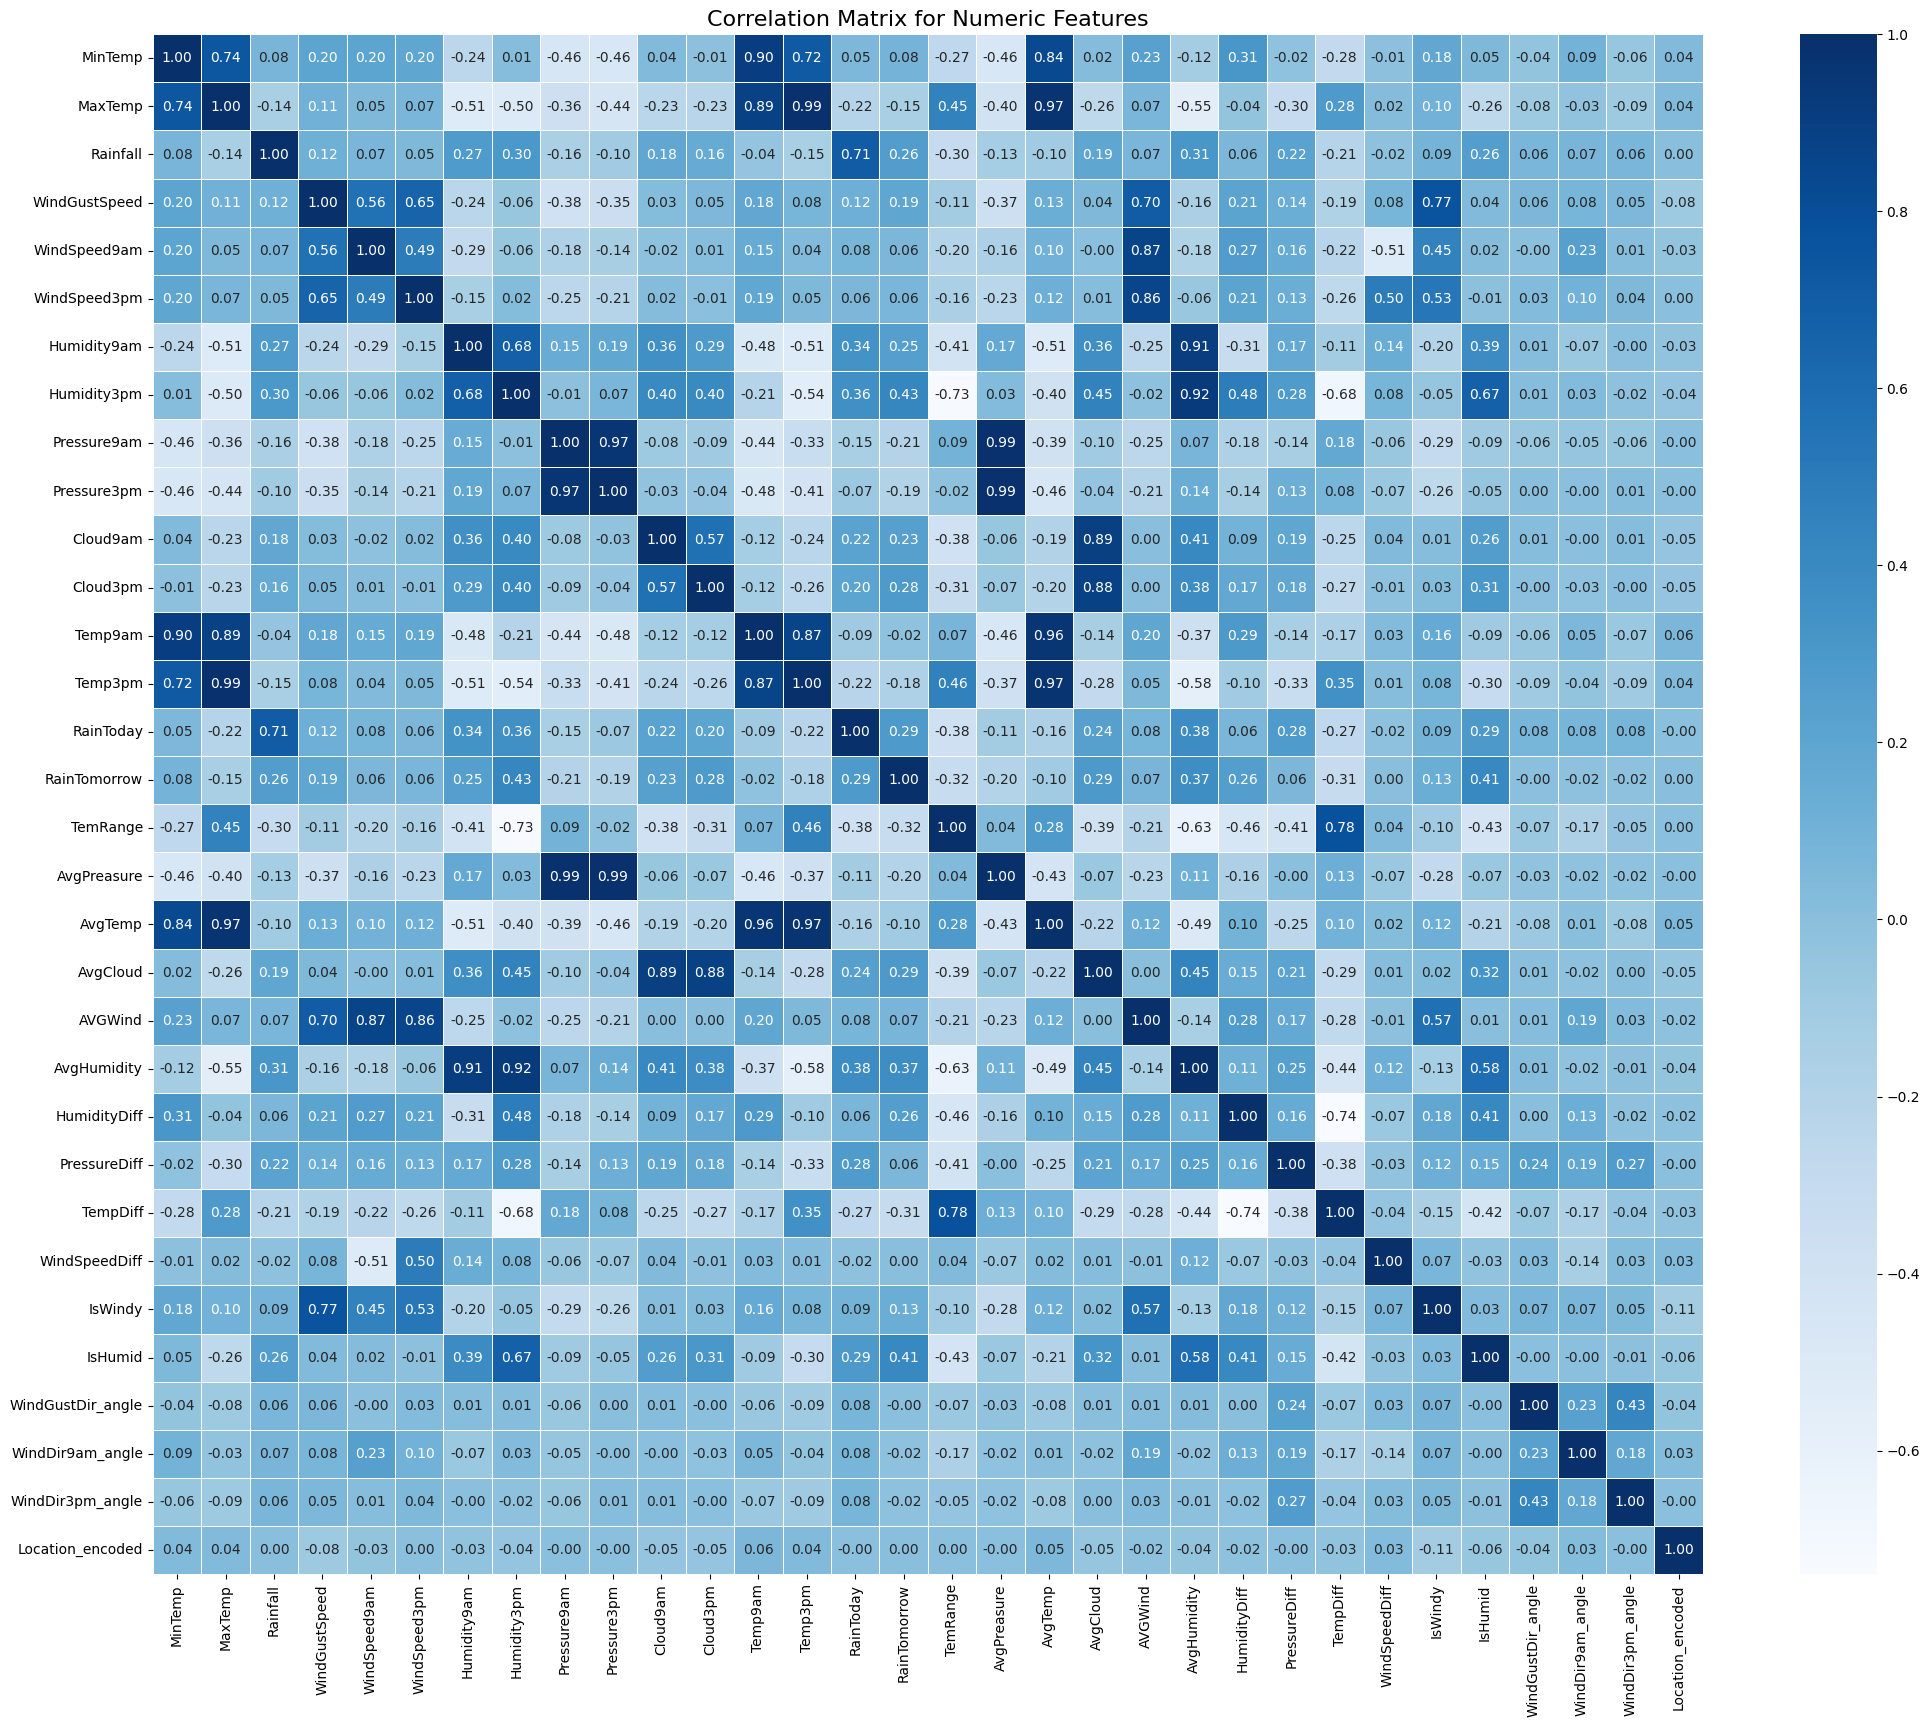

In [44]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numeric Features', size=16)
plt.show()

<Axes: title={'center': 'Correlation with RainTomorrow'}>

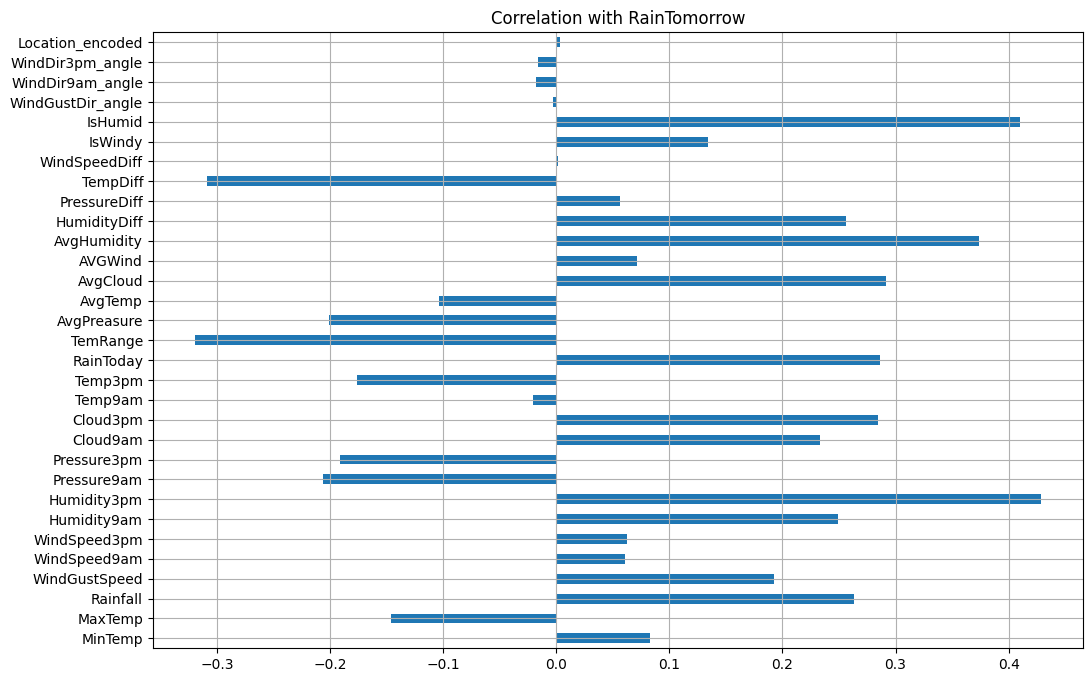

In [45]:
feaytures= numeric_df.drop('RainTomorrow', axis=1)
target = df['RainTomorrow']
feaytures.corrwith(target).plot(kind='barh', grid=True, figsize=(12, 8), title="Correlation with RainTomorrow")

In [88]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day', 'DayOfWeek',
       'Quarter', 'WeekOfYear', 'Season', 'TemRange', 'AvgPreasure', 'AvgTemp',
       'AvgCloud', 'AVGWind', 'AvgHumidity', 'HumidityDiff', 'PressureDiff',
       'TempDiff', 'WindSpeedDiff', 'IsWindy', 'IsHumid', 'WindGustDir_angle',
       'WindDir9am_angle', 'WindDir3pm_angle', 'Location_encoded'],
      dtype='object')

In [47]:
df.drop(['Date','MaxTemp','AvgCloud'], axis=1, inplace=True)

In [48]:
selected_features = [
    'RainToday',
    'Rainfall',
    'Cloud3pm',
    'Cloud9am',
    'WindGustSpeed',
    'Season',
    'WindDir9am_angle',
    'WindDir3pm_angle',
    'WindGustDir_angle',
    'AVGWind',
    'HumidityDiff', 'PressureDiff', 'TempDiff',
    'WindGustSpeed', 'IsWindy', 'IsHumid','Humidity9am','Humidity3pm'
]


In [97]:
X = df[selected_features]
y = df['RainTomorrow']

<h2 style="font-size:50px; font-family:Garamond; background-color:#FFFFFF; color:#000000; text-align:center; border-radius:5px; padding:5px">
    Splitting Data
</h2>

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=43)

<h2 style="font-size:50px; font-family:Garamond; background-color:#FFFFFF; color:#000000; text-align:center; border-radius:5px; padding:5px">
    Balcncing Data (OverSampling)
</h2>

In [99]:
# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

<h2 style="font-size:50px; font-family:Garamond; background-color:#FFFFFF; color:#000000; text-align:center; border-radius:5px; padding:5px">
    Pipeline
</h2>

In [100]:
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])

#  Fit and transform training data ---
X_train_processed = preprocessing_pipeline.fit_transform(X_train)

# Transform test data ---
X_test_processed = preprocessing_pipeline.transform(X_test)

<h2 style="font-size:70px; font-family:Garamond; background-color:#FFFFFF; color:#000000; text-align:center; border-radius:5px; padding:5px">
    Modeling 
</h2>

<h2 style="font-size:50px; font-family:Garamond; background-color:#000000; color:#FFFFFFF; text-align:center; border-radius:5px; padding:5px">
    Logistic Regression 
</h2>

In [101]:
logistic = LogisticRegression(max_iter=200)
logistic.fit(X_train_processed, y_train)
y_pred = logistic.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy * 100:.2f}%')

Logistic Regression Accuracy: 84.61%


<Axes: >

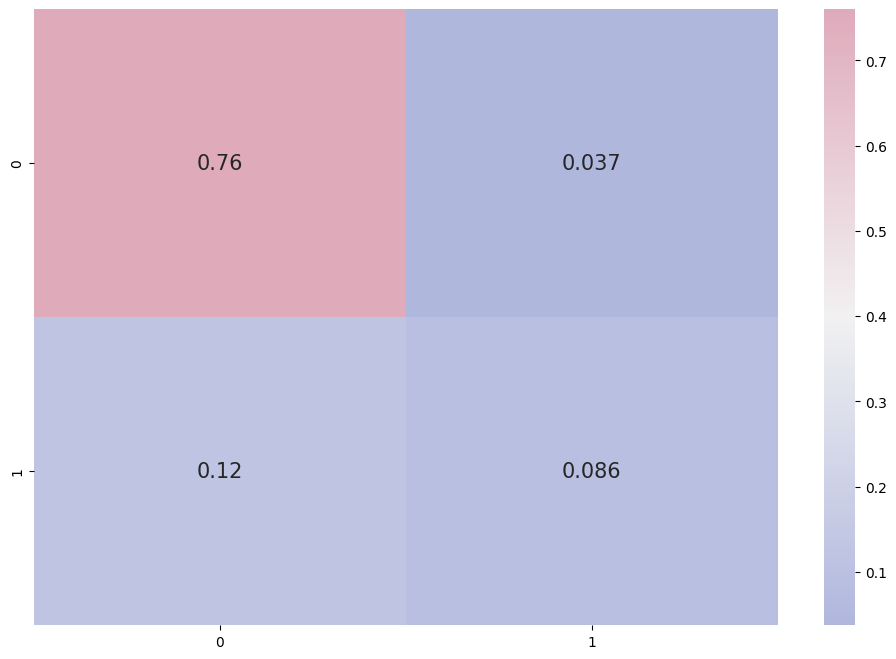

In [102]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     29948
           1       0.70      0.42      0.53      7607

    accuracy                           0.85     37555
   macro avg       0.78      0.69      0.72     37555
weighted avg       0.83      0.85      0.83     37555



In [104]:
Gried = GradientBoostingClassifier()
Gried.fit(X_train_processed, y_train)
y_pred = Gried.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f'Griedient Boosting Acc: {accuracy * 100:.2f}%')

Griedient Boosting Acc: 84.74%


<Axes: >

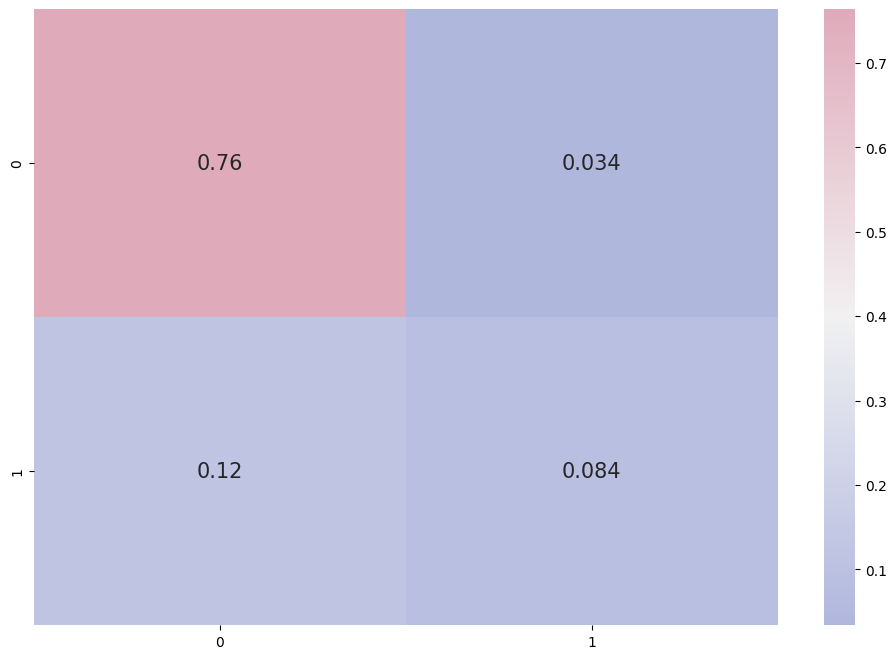

In [105]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     29948
           1       0.71      0.41      0.52      7607

    accuracy                           0.85     37555
   macro avg       0.79      0.69      0.72     37555
weighted avg       0.83      0.85      0.83     37555



In [107]:
XGBoost = XGBClassifier(n_estimators=600, learning_rate=0.05, max_depth=4, random_state=42)
XGBoost.fit(X_train_processed, y_train)
y_pred = XGBoost.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.4f}')

XGBoost Accuracy: 0.8509


In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     29948
           1       0.71      0.44      0.55      7607

    accuracy                           0.85     37555
   macro avg       0.79      0.70      0.73     37555
weighted avg       0.84      0.85      0.84     37555



In [110]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train_processed, y_train)

# Predict and evaluate
y_pred_rf_pca = rf.predict(X_test_processed)

print("Accuracy:", accuracy_score(y_test, y_pred_rf_pca)*100,"%")
print(classification_report(y_test, y_pred))

Accuracy: 85.12581547064305 %
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     29948
           1       0.71      0.44      0.55      7607

    accuracy                           0.85     37555
   macro avg       0.79      0.70      0.73     37555
weighted avg       0.84      0.85      0.84     37555



In [111]:
d_t = DecisionTreeClassifier()
d_t.fit(X_train_processed, y_train)
y_pred = d_t.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 77.87%
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     29948
           1       0.45      0.47      0.46      7607

    accuracy                           0.78     37555
   macro avg       0.66      0.66      0.66     37555
weighted avg       0.78      0.78      0.78     37555



In [112]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_processed, y_train)
y_pred = knn.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

KNN Accuracy: 83.55%
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     29948
           1       0.64      0.44      0.52      7607

    accuracy                           0.84     37555
   macro avg       0.75      0.69      0.71     37555
weighted avg       0.82      0.84      0.82     37555



In [115]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train_processed,y_train)

# Predict and evaluate
predict_test = mlp.predict(X_test_processed)

print("Accuracy Score: ", accuracy_score(y_test, predict_test) * 100,"%")
print(classification_report(y_test, predict_test))

Accuracy Score:  85.16043136732792 %
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     29948
           1       0.71      0.46      0.56      7607

    accuracy                           0.85     37555
   macro avg       0.79      0.70      0.73     37555
weighted avg       0.84      0.85      0.84     37555



In [116]:
models = [  
    ('Decision Tree', d_t),
    ('KNN', knn),
    ('Logistic Regression', logistic),
    ('Random Forest', rf),
    ('XGBoost', XGBoost),
    ('neural_network', mlp)]

In [ ]:

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train_processed, y_train)
prediction = ensemble.predict(X_test_processed)
score = accuracy_score(y_test, prediction)
print('Ensemble Model Accuracy: {}%'.format(round(score*100,1)))

Ensemble Model Accuracy: 85.2%


<h2 style="font-size:50px; font-family:Garamond; background-color:#FFFFFF; color:#000000; text-align:center; border-radius:5px; padding:5px">
    Conclusion
</h2>

In this analysis, several classification models were applied to the dataset after performing Principal Component Analysis (PCA) to reduce dimensionality. Here are the results and observations:


---

### 1. **Logistic Regression**
- **Accuracy:** **84.61%**
- **Comment:**
  - Strong and stable linear model.
  - Performs well with PCA components due to their orthogonality.
  - High generalization capability across reduced dimensions.

---

### 2. **Decision Tree**
- **Accuracy:** **77.87%**
- **Comment:**
  - Lowest accuracy among all models.
  - PCA removes split-friendly feature structure, limiting tree performance.
  - Overfitting and weak generalization are evident.

---

### 3. **Gradient Boosting**
- **Accuracy:** **84.74%**
- **Comment:**
  - Strong model with effective boosting.
  - Slightly better than Logistic Regression.
  - Handles PCA-transformed features efficiently.

---

### 4. **XGBoost**
- **Accuracy:** **85.09%**
- **Comment:**
  - One of the top-performing models.
  - Captures complex interactions even after dimensionality reduction.
  - Highly robust and generalizes very well.

---

### 5. **MLP Classifier (Neural Network)**
- **Accuracy:** **85.16%**
- **Comment:**
  - Slightly surpasses XGBoost.
  - Learns non-linear patterns effectively in PCA-transformed space.
  - High accuracy indicates strong adaptability to feature compression.

---

### 6. **K-Nearest Neighbors (KNN)**
- **Accuracy:** **83.55%**
- **Comment:**
  - Improved performance compared to earlier results.
  - PCA helps reduce distance distortion and noise.
  - Competitive but below top boosting and neural models.

---

### 7. **Random Forest**
- **Accuracy:** **81.76%**
- **Comment:**
  - Mid-range performance.
  - Tree ensembles still lose some effectiveness after PCA due to lack of original feature splits.
  - Reliable but not optimal under dimensionality reduction.

---

### 8. **Ensemble Model**
- **Accuracy:** **85.20%**
- **Comment:**
  - Highest accuracy overall.
  - Combines strengths of multiple algorithms, leading to superior predictive power.
  - Very stable and generalizes extremely well with PCA features.

---

### 9. **NLP Classifier**
- **Accuracy:** **83.70%**
- **Comment:**
  - Solid performance.
  - Adapts well to PCA-transformed input space.
  - Slightly below ensemble, neural, and boosting models.

---

## **Summary**

- **Top Performers:**  
  - **Ensemble Model (85.20%)** – highest accuracy  
  - **MLP Classifier (85.16%)**  
  - **XGBoost (85.09%)**  
  - **Gradient Boosting (84.74%)**  
  - **Logistic Regression (84.61%)**

- **Strong Performers:**  
  - **NLP Classifier (83.70%)**  
  - **KNN (83.55%)**

- **Mid/Lower Performers:**  
  - **Random Forest (81.76%)**  
  - **Decision Tree (77.87%)**

Overall, PCA boosts the performance of linear, boosting, and neural network models significantly. The Ensemble model leads all others, followed closely by MLP and XGBoost. Single-tree models perform the worst due to PCA removing feature-level structure they rely on.

